In [250]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
low_memory=False

%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [252]:

producao = pd.ExcelFile('producao.xlsx')
arquivo = pd.read_excel(producao, sheet_name='CONTROLE')

Text(0.5, 1.0, 'Projetos em andamendo com maior numero de peças')

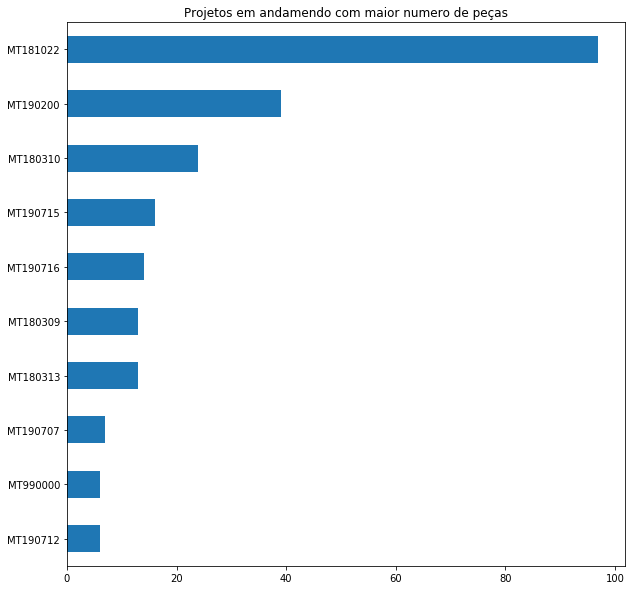

In [271]:
arquivo.query('ENTREGA == "NOK"')['P.O.:'].value_counts().sort_values().tail(10).plot(kind='barh',figsize=(10,10))
plt.title('Projetos em andamendo com maior numero de peças')

In [254]:
print('HORAS DE TORNO')
arquivo.query('ENTREGA == "NOK"')['TORNO'].sum()/60
totalt=(arquivo.query('ENTREGA == "NOK"')['TORNO'].sum()/60)/8
print(f'O torno está ocupado por um total de {int(totalt)} dias')

HORAS DE TORNO
O torno está ocupado por um total de 35 dias


In [255]:
print('HORAS DE FRESA')
arquivo.query('ENTREGA == "NOK"')['FRESA'].sum()/60
totalf=(arquivo.query('ENTREGA == "NOK"')['FRESA'].sum()/60)/8
print(f'A fresadora está ocupado por um total de {int(totalf)} dias')

HORAS DE FRESA
A fresadora está ocupado por um total de 44 dias


In [256]:
print('HORAS DE PROGRAMAÇÃO')
arquivo.query('ENTREGA == "NOK"')['PROG.'].sum()/60
totalp=(arquivo.query('ENTREGA == "NOK"')['PROG.'].sum()/60)/8
print(f'A programação está ocupado por um total de {int(totalp)} dias')

HORAS DE PROGRAMAÇÃO
A programação está ocupado por um total de 31 dias


In [257]:
print('HORAS DE AJUSTAGEM')
arquivo.query('ENTREGA == "NOK"')['AJUST'].sum()/60
totala=(arquivo.query('ENTREGA == "NOK"')['AJUST'].sum()/60)/8
print(f'A Ajustagem está ocupado por um total de {int(totala)} dias')

HORAS DE AJUSTAGEM
A Ajustagem está ocupado por um total de 25 dias


In [258]:
print('HORAS DE CTX')
arquivo.query('ENTREGA == "NOK"')['CTX'].sum()/60
totalc=(arquivo.query('ENTREGA == "NOK"')['CTX'].sum()/60)/8
print(f'A CTX está ocupado por um total de {int(totalc)} dias')

HORAS DE CTX
A CTX está ocupado por um total de 5 dias


In [259]:
print('HORAS DE SOLDA')
arquivo.query('ENTREGA == "NOK"')['SOLDA'].sum()/60
totals=(arquivo.query('ENTREGA == "NOK"')['SOLDA'].sum()/60)/8
print(f'A Solda está ocupado por um total de {int(totals)} dias')

HORAS DE SOLDA
A Solda está ocupado por um total de 18 dias


In [260]:
print('HORAS DE TRATAMENTO SUPERFICIAL')
arquivo.query('ENTREGA == "NOK"')['T. SUP'].sum()/60
totalts=(arquivo.query('ENTREGA == "NOK"')['T. SUP'].sum()/60)/8
print(f'O tratamento superficial está ocupado por um total de {int(totalts)} dias')

HORAS DE TRATAMENTO SUPERFICIAL
O tratamento superficial está ocupado por um total de 1 dias


In [261]:
print('HORAS DE MATÉRIA PRIMA')
arquivo.query('ENTREGA == "NOK"')['MP'].sum()/60
totalm=(arquivo.query('ENTREGA == "NOK"')['MP'].sum()/60)/8
print(f'A preparação de matéria prima está ocupado por um total de {int(totalm)} dias')

HORAS DE MATÉRIA PRIMA
A preparação de matéria prima está ocupado por um total de 17 dias


In [262]:
print('HORAS DE RETIFICA/AFIAÇÃO')
arquivo.query('ENTREGA == "NOK"')['RETIF. / AFIA.'].sum()/60
totalra=(arquivo.query('ENTREGA == "NOK"')['RETIF. / AFIA.'].sum()/60)/8
print(f'A Retificadora e afiadora está ocupado por um total de {int(totalra)} dias')

HORAS DE RETIFICA/AFIAÇÃO
A Retificadora e afiadora está ocupado por um total de 2 dias


In [263]:
print('HORAS DE PINTURA')
arquivo.query('ENTREGA == "NOK"')['PINT.'].sum()/60
totalpi=(arquivo.query('ENTREGA == "NOK"')['PINT.'].sum()/60)/8
print(f'A Pintura está ocupado por um total de {int(totalpi)} dias')

HORAS DE PINTURA
A Pintura está ocupado por um total de 7 dias


In [264]:
print('HORAS DE PROJETO')
arquivo.query('ENTREGA == "NOK"')['PROJETO'].sum()/60
totalpr=(arquivo.query('ENTREGA == "NOK"')['PROJETO'].sum()/60)/8
print(f'O projeto está ocupado por um total de {int(totalpr)} dias')

HORAS DE PROJETO
O projeto está ocupado por um total de 47 dias


In [265]:
print('HORAS DE INSPEÇÃO')
arquivo.query('ENTREGA == "NOK"')['INSP'].sum()/60
totalin=(arquivo.query('ENTREGA == "NOK"')['INSP'].sum()/60)/8
print(f'A Inspeção está ocupado por um total de {int(totalin)} dias')

HORAS DE INSPEÇÃO
A Inspeção está ocupado por um total de 23 dias


Text(0, 0.5, 'DIAS')

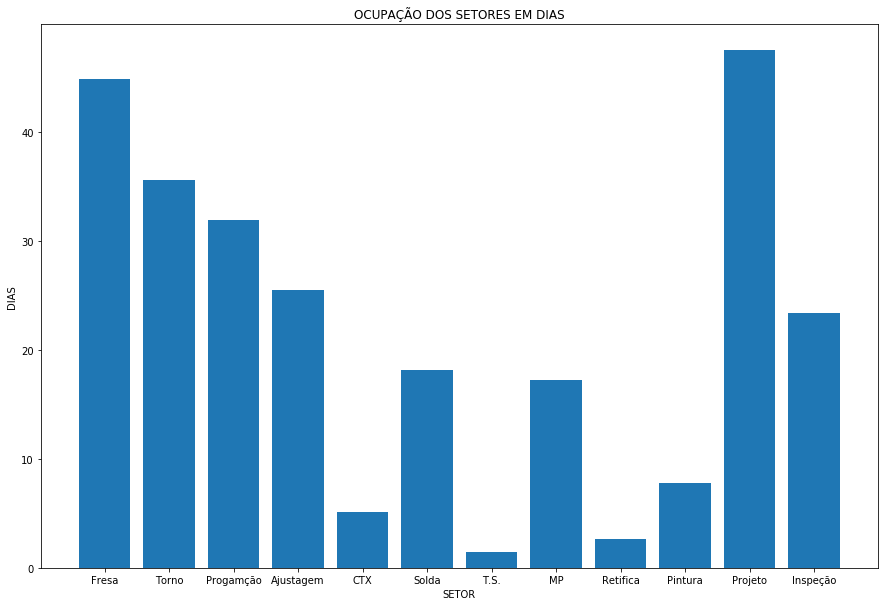

In [272]:
a=(totalf,totalt,totalp,totala,totalc,totals,totalts,totalm,totalra,totalpi,totalpr,totalin)
b=('Fresa','Torno','Progamção','Ajustagem','CTX','Solda','T.S.','MP','Retifica','Pintura','Projeto','Inspeção')
plt.figure(figsize=(15, 10)) 
plt.bar(b,a)
plt.title('OCUPAÇÃO DOS SETORES EM DIAS')
plt.xlabel('SETOR')
plt.ylabel('DIAS')

Text(0, 0.5, 'Quantidade')

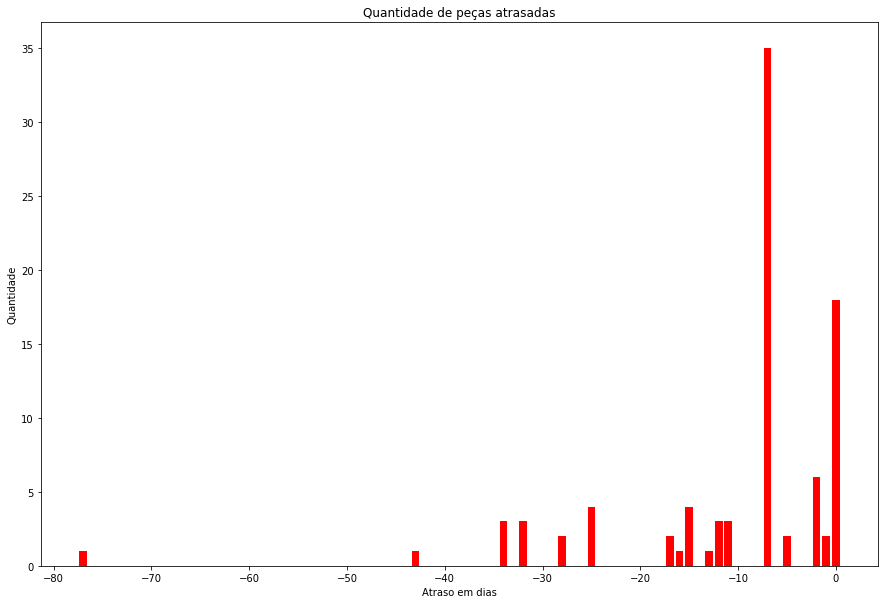

In [273]:
k={}
for lead,quant in arquivo.query('ENTREGA == "NOK"')['LEAD TIME'].value_counts().items():
    k[lead]=quant
h=[]
j=[]

for x in sorted(k):
    if x<1:
        h.append(x)
        j.append(k[x])
        
plt.figure(figsize=(15, 10))        
plt.bar(h,j,color='red')
plt.title('Quantidade de peças atrasadas')
plt.xlabel('Atraso em dias')
plt.ylabel('Quantidade')


Text(0, 0.5, 'QUANTIDADE')

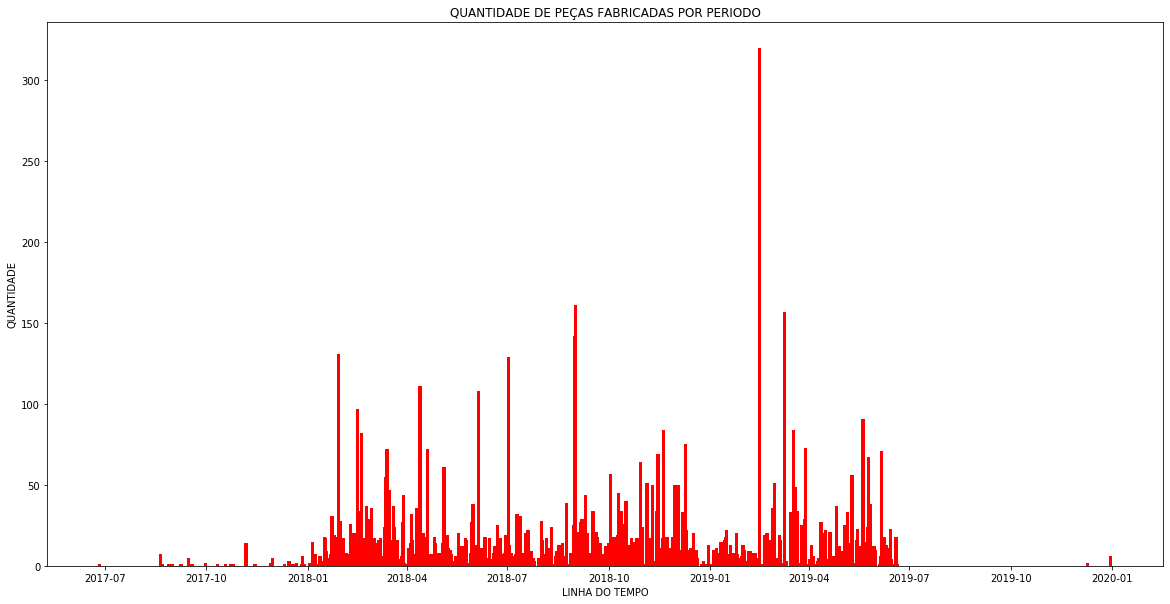

In [275]:
k={}
for lead,quant in arquivo.query('ENTREGA == "OK"')['PREVISAO'].value_counts().items():
    k[lead]=quant
h=[]
j=[]

for x in sorted(k):
    
        h.append(x)
        j.append(k[x])
        
plt.figure(figsize=(20, 10))
plt.bar(h,j,color='red',width=3)

plt.title('QUANTIDADE DE PEÇAS FABRICADAS POR PERIODO')
plt.xlabel('LINHA DO TEMPO')
plt.ylabel('QUANTIDADE')


